# 프로젝트 목적

패스트캠퍼스 온라인 강의 결제 내역 데이터를 보고 데이터 사이언스가 되었다고 가정하여 데이터를 분석해 본다.

## 데이터 보기 전 분석해 볼 것 생각해보기

01 고객군 분석 : 패스트캠퍼스에서 강의를 구매하는 사람들은 어떤 그룹으로 분류되며 어떤 특징을 가질 것인가?

02 콘텐츠 기획 분석 : 사람들은 어떤 콘텐츠를 많이 구매할까? 마케팅 효과가 있는지, 특정 그룹의 상품이 효과가 있는지 등을 확인

03 시기별 분석 : 어떤 년도, 월에 강의 콘텐츠 구매가 높을까? 어떤 시기에 구매율이 높고 왜 높은지 생각(코로나, 재택근무, 마케팅 증가 등)

04 금액별 분석 : 판매 되는 가격과 실제 결제 가격의 차이가 얼마나 될까? 쿠폰할인, PG사 포인트할인 등을 사용해 얼마나 할인을 받아 구매가 이루어지는지, 쿠폰을 안쓰는 사람들은 얼마나 있는지

05 강의별 분석 : 많이 구매된 강의는 어떤 특징을 가질까? 판매 시점부터 얼마나 지나서 구매가 많이 이루어질지 생각, 환불율이 높은 강의는 어떤 강의인지 분석, 금액이 높은강의가 잘 팔릴지, 낮은 강의가 잘 팔릴지

시기 강의

# 데이터 불러오기

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/220509 mini project/파이널프로젝트_RAW_210329_210926.xlsx')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [4]:
# 폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [34]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [35]:
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'),
 ('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')]

## 데이터 설명 및 가설 설정

  id : 해당 거래내역에 대한 ID (PK)

  customer_id : 결제한 고객 ID

  course_id : 강의 ID(프로모션에 대해서는 값이 할당되어 있지 않음)

  type : 거래의 종류

  state : 거래에 대한 상태

  course_title : 강의 제목

  category_title : 대분류

  format : 온라인 강의의 기획 종류

  completed_at : state가 COMPLETED로 변경된 시점

  transaction_amount : 최종 결제 금액

  coupon_title : 쿠폰 종류

  coupon_dicount_amount : 쿠폰 할인 금액

  sale_price : 판매 금액

  tax_free_amount : 보안상 컬럼 삭제 *

  pg : PG사 종류

  method : 결제 방식

  subcategory_title : 중분류

  marketing_start_at : 강의 판매 시점





# EDA

In [6]:
# 컬럼명 바꾸기
df.rename(columns={'transaction_amount':'payment_amount'},inplace = True)
df.rename(columns={'pg':'agent'},inplace = True)

실제 데이터를 뜯어보아서 목적에 영향을 낄칠 데이터와 아닌 것을 잡는 과정

In [7]:
#데이터 타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   payment_amount          105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

In [8]:
#기초 통계량 확인

df.describe()

,id,customer_id,course_id,payment_amount,coupon_discount_amount,sale_price,tax_free_amount
count,1.054190e+05,105416.000000,100212.000000,1.054190e+05,3.181700e+04,1.042910e+05,1.042910e+05
mean,1.147054e+06,417248.252742,203868.586327,1.464814e+05,4.972172e+04,1.610808e+05,1.575551e+05
std,1.125898e+05,206414.496648,1534.583331,7.195061e+05,5.624467e+04,3.955298e+05,3.898133e+05
min,5.679930e+05,16.000000,2516.000000,-4.144074e+06,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.048940e+06,256401.000000,203100.000000,8.350000e+04,2.000000e+04,1.090000e+05,1.090000e+05
50%,1.135186e+06,501046.000000,203787.000000,1.175000e+05,2.100000e+04,1.320000e+05,1.320000e+05
75%,1.240472e+06,566595.000000,204775.000000,1.590000e+05,6.915000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,672308.000000,207742.000000,1.134000e+08,2.000000e+06,9.094000e+07,9.094000e+07


## 결측치 확인

In [9]:
#결측치 확인
#coupon쪽에 결측치 많음
df.isnull().sum().sort_values(ascending=False)

coupon_title              73602
coupon_discount_amount    73602
subcategory_title         19829
marketing_start_at        17979
agent                     15075
method                    13096
course_id                  5207
tax_free_amount            1128
sale_price                 1128
category_title               24
course_title                 16
format                       16
customer_id                   3
id                            0
completed_at                  0
state                         0
type                          0
payment_amount                0
dtype: int64

In [10]:
#dataframe형식으로 결측치 값과 비율을 출력

raw_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
raw_info = raw_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values(nb)'}))
raw_info = raw_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))

display(raw_info)
display(df[:5])

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,agent,method,subcategory_title,marketing_start_at
column type,int64,float64,float64,object,object,object,object,object,datetime64[ns],int64,object,float64,float64,float64,object,object,object,datetime64[ns]
null values(nb),0,3,5207,0,0,16,24,16,0,0,73602,73602,1128,1128,15075,13096,19829,17979
null values (%),0.0,0.002846,4.939337,0.0,0.0,0.015178,0.022766,0.015178,0.0,0.0,69.818534,69.818534,1.070016,1.070016,14.300079,12.422808,18.809702,17.0548


,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,agent,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


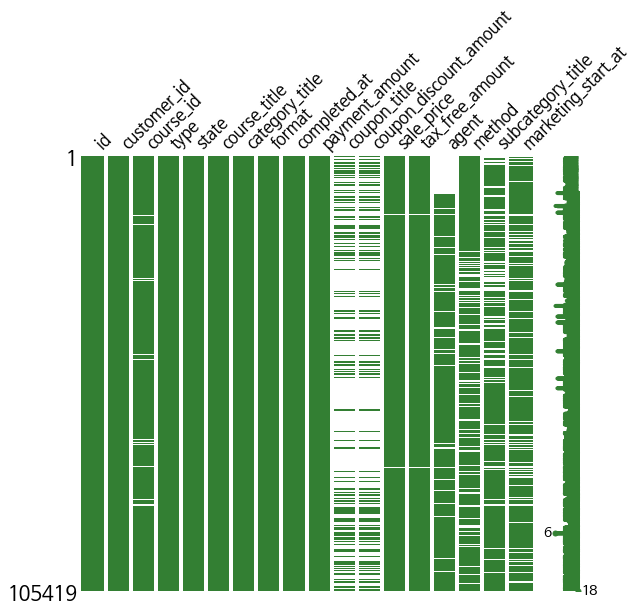

In [11]:
#결측치 시각화
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.2, 0.5, 0.2))

## 데이터 전처리

In [12]:
del df['tax_free_amount'] # 보안상 데이터 공유 불가로 컬럼 삭제

df['coupon_title'].fillna('사용안함', inplace=True) # 빈 결측치를 '쿠폰사용안함'으로 처리

df['coupon_discount_amount'].fillna(0.0,inplace=True) # 빈 결측치를 0.0 으로 처리

df['agent'].fillna('ETC', inplace=True) # pg대행사 이외의 결제는 기타(ETC)로 처리

df.drop(index=47361, axis=0, inplace=True) # 불필요한 row 삭제

df['subcategory_title'].fillna('해당없음', inplace=True) # 빈 결측치를 '해당없음'으로 처리

df['course_id'].replace('', np.nan, inplace=True)

df.dropna(subset=['course_id'], inplace=True) # DROP (null) -> 대부분 프로모션 ,한정 판매

df['sale_price'].replace('', np.nan, inplace=True)

df.dropna(subset=['sale_price'],inplace=True) # DROP (null)

In [13]:
# 전처리 확인
df.head(10)

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,payment_amount,coupon_title,coupon_discount_amount,sale_price,agent,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,사용안함,0.0,110500.0,ETC,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,해당없음,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,사용안함,0.0,190900.0,ETC,CARD,해당없음,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14
5,970655,478028.0,201797.0,ORDER,CANCELLED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:56,97500,사용안함,0.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14
7,970664,460730.0,200622.0,ORDER,CANCELLED,올인원 패키지 : 기업가치 평가와 M&A 전략 실무,부동산/금융,올인원,2021-03-28 15:25:42,112500,사용안함,0.0,122500.0,ETC,CARD,금융/투자 실무,2019-05-02
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02
9,970667,478033.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:48,96000,사용안함,0.0,116000.0,ETC,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,사용안함,0.0,263000.0,ETC,CARD,해당없음,2020-11-27


# EDA 진행

## type *결측치 확인

In [14]:
df['type'].value_counts()

PAYMENT    57895
ORDER      37568
REFUND      3637
Name: type, dtype: int64

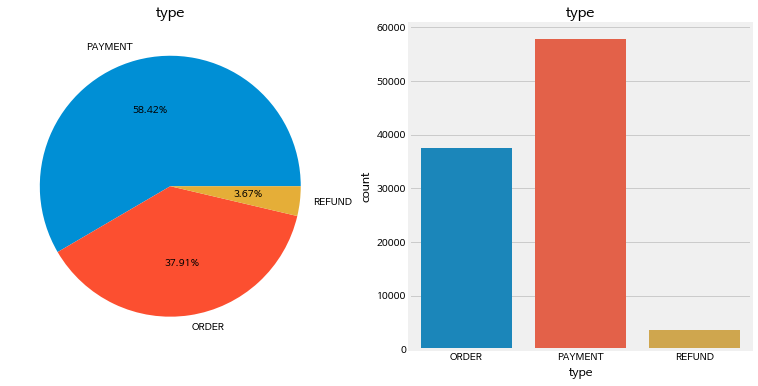

In [15]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.2f%%',ax=graph1)
graph1.set_title('type')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('type',data=df,ax=graph2)
graph2.set_title('type')
plt.show(fig)

## state *결측치 확인

In [16]:
df['state'].value_counts()

COMPLETED    59154
CANCELLED    38704
PENDING       1065
DELETED        164
REQUESTED       13
Name: state, dtype: int64

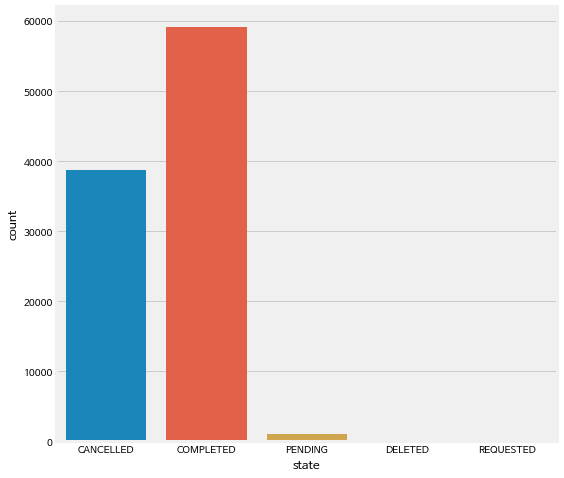

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x='state')
plt.show()

## course_title 분석하기 적합x

In [18]:
df['course_title'].value_counts()

초격차 패키지 : 한 번에 끝내는 프론트엔드 개발               3255
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터    2756
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집               2540
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법    2132
올인원 패키지 : star741의 캐주얼 일러스트 드로잉           1636
                                          ... 
승인받는 이모티콘 만들기 온라인 완주반 1기                     1
(B2B) 리틀프렌즈 온라인 구독 올 플랜                      1
(B2B) 비바리퍼블리카 온라인 구독 올 플랜 (8월-6개월)           1
브런치로 책 출판 온라인 완주반 3기                         1
(B2B) 디캠프 패밀리사 온라인 구독 올 플랜 (9월)              1
Name: course_title, Length: 404, dtype: int64

## category_title

In [19]:
df['category_title'].value_counts()

프로그래밍       33109
업무 생산성      12896
데이터사이언스     12632
디자인         11989
영상/3D       10248
마케팅          9319
부동산/금융       5287
투자/재테크       2501
크리에이티브        911
교육            128
지식콘텐츠          56
비즈니스           12
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64

### 구매가 많은 카테고리

In [41]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

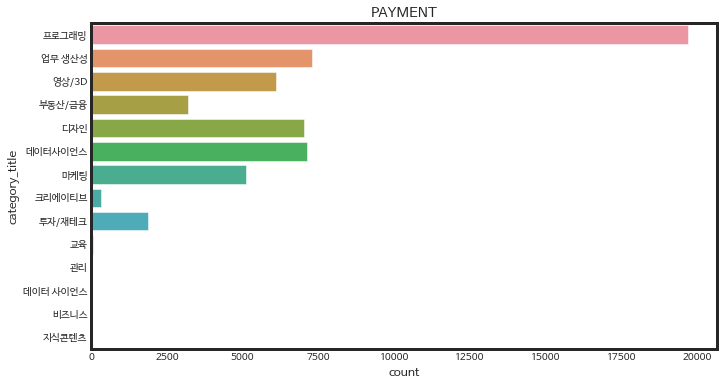

In [42]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='category_title')
plt.title('PAYMENT')

### 환불이 많은 카테고리

In [46]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

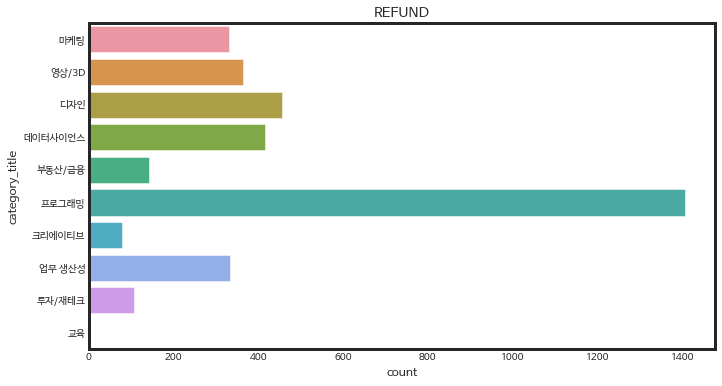

In [47]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='category_title')
plt.title('REFUND')

## format *올인원 내에서 분석해보기

In [20]:
df['format'].value_counts()

올인원        82181
RED         6253
온라인 완주반     3815
하루10분컷      2978
스쿨 온라인      1057
스쿨           957
B2B          763
B2G          591
이벤트          193
B2B 온라인      132
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
Name: format, dtype: int64

### 구매가 많은 강의 기획

In [48]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

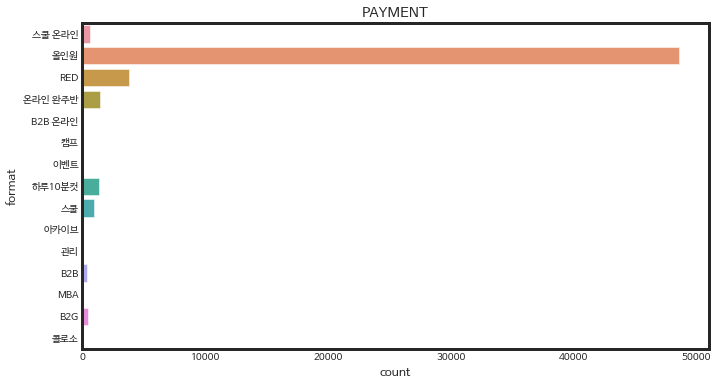

In [49]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='format')
plt.title('PAYMENT')

### 환불이 많은 강의 기획

In [50]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

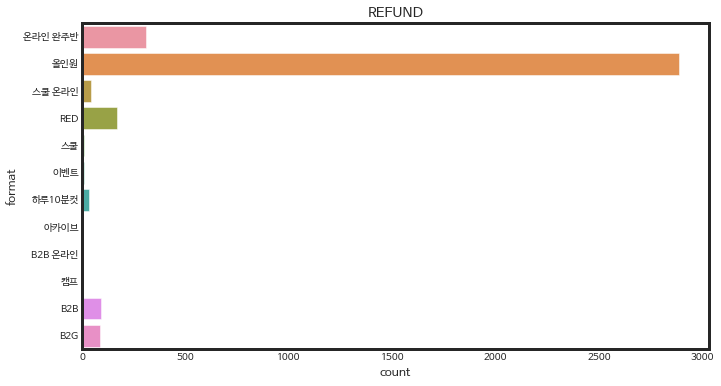

In [51]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='format')
plt.title('REFUND')

##completed_at

In [21]:
df['completed_at'].value_counts()

2021-09-17 14:37:49    16
2021-03-30 13:42:51    15
2021-05-03 16:15:25    10
2021-04-28 09:31:40     8
2021-08-12 13:32:10     8
                       ..
2021-05-19 12:36:06     1
2021-05-19 12:28:38     1
2021-05-19 12:16:50     1
2021-05-19 12:16:33     1
2021-09-25 14:25:47     1
Name: completed_at, Length: 92976, dtype: int64

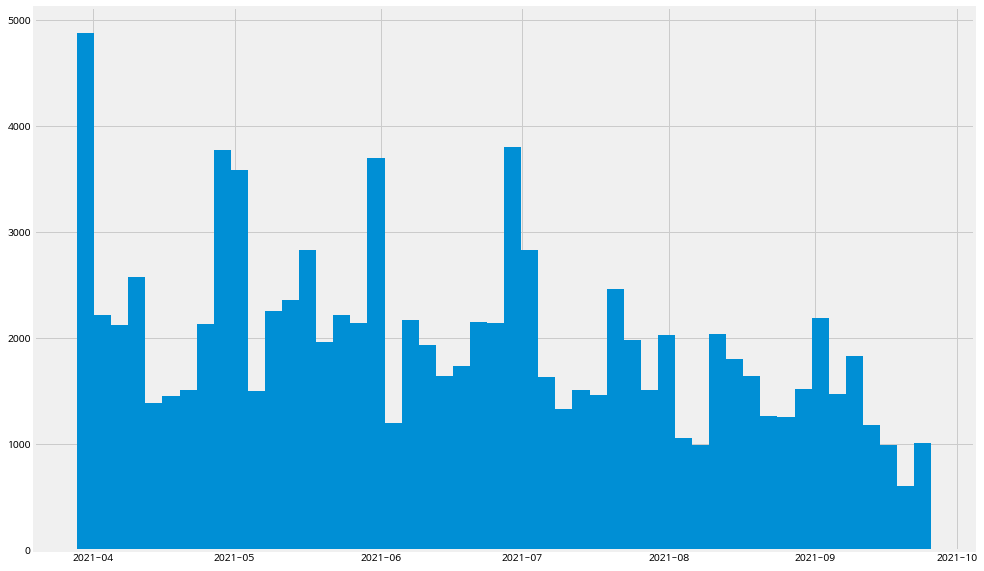

In [22]:
df['completed_at'].hist(bins=50,figsize=(15,10))

### REFUND & PAYMENT

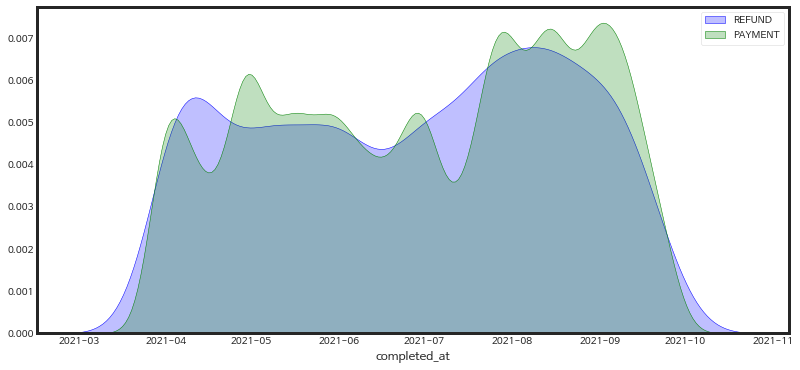

In [58]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["completed_at"][(df["type"] == "REFUND")], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["completed_at"][(df["type"] == "PAYMENT")], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("completed_at")
graph1.set_ylabel("")
graph1.legend(["REFUND","PAYMENT"])

## payment_amount(transaction_amount)

In [23]:
df['payment_amount'].value_counts()

 0         4733
 99000     1905
 119000    1649
 149000    1615
 100000    1559
           ... 
 600          1
-41500        1
 64542        1
-417000       1
-108186       1
Name: payment_amount, Length: 2174, dtype: int64

## coupon_title 분석하기 적합x

In [24]:
df['coupon_title'].value_counts()

사용안함                                                     67287
[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰                                  5498
[WELCOME] 온라인 강의 3만원 할인쿠폰                                 3206
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰                                  2469
[WELCOME] 온라인 강의 2만원 할인쿠폰                                 2325
                                                         ...  
[무료수강권] 한 번에 끝내는 Java/Spring 웹 개발 마스터 초격차 패키지_안성훈 강사님        1
오늘 단 하루! 하루 10분컷 5%할인 (~6/2)                                 1
[무료수강권] RED 검수용_공정필 PM님                                      1
[서포터즈 전용] 재무/세무 회계 실무 완성 무료 수강                               1
[재결제쿠폰]초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍                    1
Name: coupon_title, Length: 495, dtype: int64

## coupon_discount_amount

In [25]:
df['coupon_discount_amount'].value_counts()

0.0          67288
20000.0       9428
10000.0       5712
30000.0       4587
50000.0        642
             ...  
48750.0          1
2000000.0        1
158900.0         1
2500.0           1
11000.0          1
Name: coupon_discount_amount, Length: 772, dtype: int64

## sale_price

In [26]:
df['sale_price'].value_counts()

149000.0     2219
99000.0      2178
119000.0     2051
159000.0     2023
100000.0     1995
             ... 
6900000.0       1
152100.0        1
575000.0        1
409810.0        1
352000.0        1
Name: sale_price, Length: 525, dtype: int64

## agent(pg)

In [27]:
df['agent'].value_counts()

INICIS    56385
KAKAO     16524
ETC       13760
NAVER      7755
PAYCO      4367
CHAI        309
Name: agent, dtype: int64

## method

In [28]:
df['method'].value_counts()

CARD         62764
VBANK         8112
POINT         7860
PROMOTION     4733
TRANS         2594
TRANSFER       656
ONSITE          37
VOUCHER          5
Name: method, dtype: int64

## subcategory_title

In [29]:
df['subcategory_title'].value_counts()

해당없음         13542
영상 편집         7307
백엔드 개발        6143
개발자 커리어       5917
프론트엔드 개발      5877
딥러닝/인공지능      4589
데이터분석         4300
PPT/보고서       4150
디자인툴          4050
모바일앱          3724
엑셀/VBA        3590
글쓰기/카피라이팅     3524
일러스트          3238
UX/UI         2774
데이터마케팅        2306
DevOps        2135
금융/투자 실무      2074
모션그래픽         2033
머신러닝          1958
회계/재무/세무      1945
시각디자인         1927
주식 투자         1787
디지털마케팅        1754
게임            1707
SNS마케팅        1185
부동산 개발        1174
업무자동화          996
코딩 입문          782
부동산 투자         714
VFX            523
리더십            511
게임 그래픽         385
데이터엔지니어링       275
커뮤니케이션         204
Name: subcategory_title, dtype: int64

### 구매가 많은 서브카테고리

In [59]:
# 구매가 많은 카테고리 재구성
df1 = df.groupby('type').get_group('PAYMENT')

Text(0.5, 1.0, 'PAYMENT')

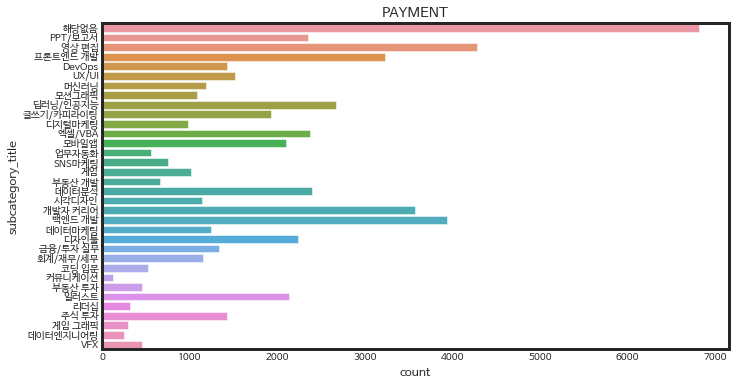

In [60]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df1, y='subcategory_title')
plt.title('PAYMENT')

### 환불이 많은 서브카테고리

In [61]:
# 환불이 많은 카테고리 재구성
df2 = df.groupby('type').get_group('REFUND')

Text(0.5, 1.0, 'REFUND')

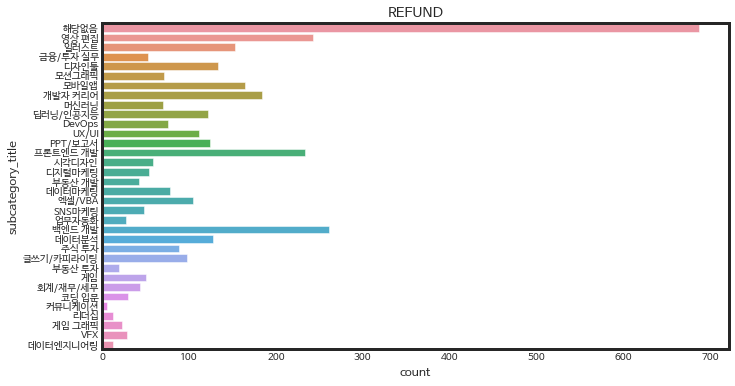

In [62]:
plt.figure(figsize=(10,6))
plt.rc("font", family="NanumBarunGothic")
sns.countplot(data=df2, y='subcategory_title')
plt.title('REFUND')

## marketing_start_at

In [30]:
df['marketing_start_at'].value_counts()

2021-02-02    3304
2021-02-01    2825
2020-12-18    2782
2021-04-28    2752
2020-12-02    2567
              ... 
2021-01-29       1
2021-02-15       1
2020-11-16       1
2020-10-29       1
2021-09-16       1
Name: marketing_start_at, Length: 177, dtype: int64

# 정리